# Compute the sequence of requests 
## Using the discrete CDF

- Fitting data for execution logs or for synthetic logs
- Generating the sequence of requests
- Computing the cost of a sequence

Input data is represented by:
 * Log data for neuroscience applications (log_example.in)
     * Array of past execution times
 * Synthetic data

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import random

import WorkloadCDF

# Log data

This example computes the sequence of requests
- using the discrete data
- using both interpolation models (polynomial and distribution) to go through a continuous fit

In [2]:
dataset = "./log_example.in"
data = np.loadtxt(dataset, delimiter=' ')
data = [int(i/100) for i in data]
print("Total entries in the historic data: %d" %(len(data)))

Total entries in the historic data: 300


# Compute the discrete CDF

Plot it and show best fit by connecting adiacent points with a line

In [3]:
# Optimal CDF by using the discrete full data both for computing the data and for computing the cost
wf = WorkloadCDF.WorkloadCDF(data)
optimal_data, optimal_cdf = wf.compute_discrete_cdf()

optimal_sequence = wf.compute_request_sequence()
print("Optimal sequence", optimal_sequence)

optimal_cost = wf.compute_sequence_cost(optimal_sequence, data)
print("Optimal cost", optimal_cost)

Optimal sequence [(808,), (990,)]
Optimal cost 870.7


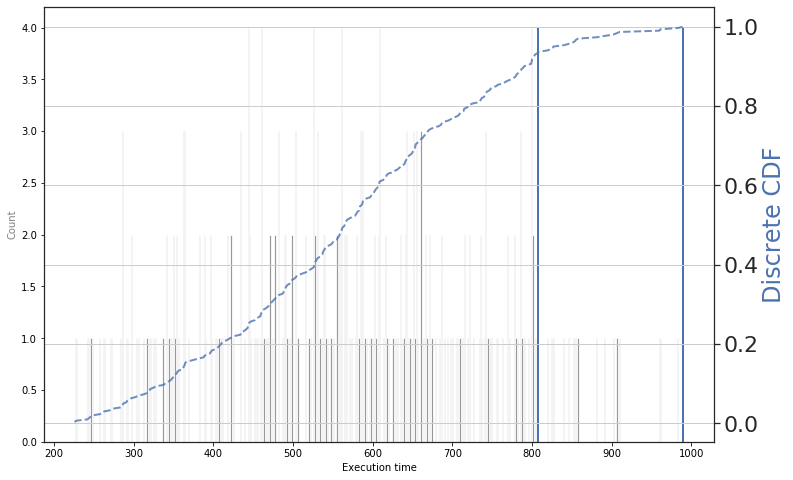

In [4]:
# plot the data and the discrete CDF (consecutive points joined by a line)

fig, ax = plt.subplots(figsize=(12,8))
sns.set(font_scale=2)
sns.set_style("white")
ax2 = ax.twinx()
# plot data
counts, bins = np.histogram(data, bins=500)
ax.hist(bins[:-1], bins, weights=counts, alpha=0.8, color="grey")

# plot sequence
ax.vlines(optimal_sequence[0], min(counts), max(counts), colors='b', lw=2,
          linestyles='solid', label='optimal')
for i in range(1,len(optimal_sequence)):
    ax.vlines(optimal_sequence[i], min(counts), max(counts), colors='b', lw=2, linestyles='solid')

# plot discrete fit
ax2.plot(optimal_data, optimal_cdf, 'b--', lw=2, alpha=0.8)

plt.grid(True)
ax.set_xlabel('Execution time')
ax2.set_ylabel('Discrete CDF', color="b")
ax.set_ylabel('Count', color="grey")
plt.show()

# Interpolate the CDF with a distribution fit

- get best disribution base on the fit

In [5]:
# compute the interpolation of the CDF (for full data)
wf.set_interpolation_model([WorkloadCDF.DistInterpolation(data)])
best_fit = wf.compute_best_cdf_fit()
if best_fit != -1:
     best_fit = wf.get_best_fit()
print(best_fit)

(<scipy.stats._continuous_distns.dgamma_gen object at 0x7f261e464b00>, (1.4282048972632326, 572.7014691743336, 95.88729008613852), 81.85344266888194)


In [6]:
all_data_discrete, all_data_cdf = wf.get_interpolation_cdf(data, best_fit)
distr_sequence = wf.compute_request_sequence()
print("Distribution sequence", distr_sequence)

Distribution sequence [(773,), (990,)]


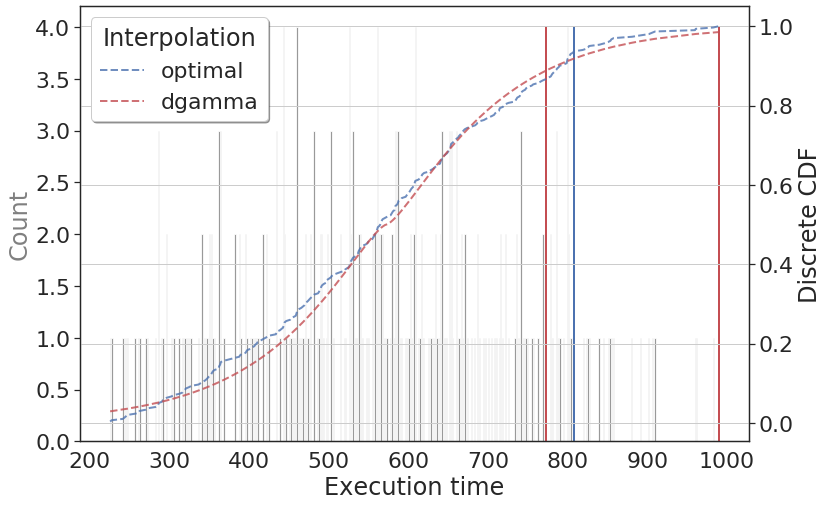

In [7]:
# plot the data and the interpolation CDF

fig, ax = plt.subplots(figsize=(12,8))
sns.set(font_scale=2)
sns.set_style("white")
ax2 = ax.twinx()
# plot data
counts, bins = np.histogram(data, bins=500)
ax.hist(bins[:-1], bins, weights=counts, alpha=0.8, color="grey")

# plot optimal sequence
ax.vlines(optimal_sequence[0], min(counts), max(counts), colors='b', lw=2,
          linestyles='solid', label='optimal')
for i in range(1,len(optimal_sequence)):
    ax.vlines(optimal_sequence[i], min(counts), max(counts), colors='b', lw=2, linestyles='solid')

# plot polynomial fit sequence
ax.vlines(distr_sequence[0], min(counts), max(counts), colors='r', lw=2,
          linestyles='solid', label='optimal')
for i in range(1,len(distr_sequence)):
    ax.vlines(distr_sequence[i], min(counts), max(counts), colors='r', lw=2, linestyles='solid')

# plot optimal fit
ax2.plot(optimal_data, optimal_cdf, 'b--', lw=2, alpha=0.8, label="optimal")

# polynomial fit
ax2.plot(all_data_discrete, all_data_cdf, 'r--', lw=2, alpha=0.8, label=best_fit[0].name)

ax2.legend(shadow=True, title="Interpolation")
plt.grid(True)
ax.set_xlabel('Execution time')
ax2.set_ylabel('Discrete CDF')
ax.set_ylabel('Count', color="grey")
#plt.savefig("distr_sequence.png")
plt.show()

# Use only the first x entries in data for interpolation

In [8]:
# define x
training_size = 10

In [9]:
training_data = random.sample(list(data), training_size)
wf = WorkloadCDF.WorkloadCDF(training_data)
discret_data, cdf = wf.compute_discrete_cdf()

discrete_sequence = wf.compute_request_sequence(max_request=max(data))
print("Discrete sequence", discrete_sequence)
print("Discrete cost", wf.compute_sequence_cost(discrete_sequence, data))

Discrete sequence [(711,), (906,), (990,)]
Discrete cost 923.8


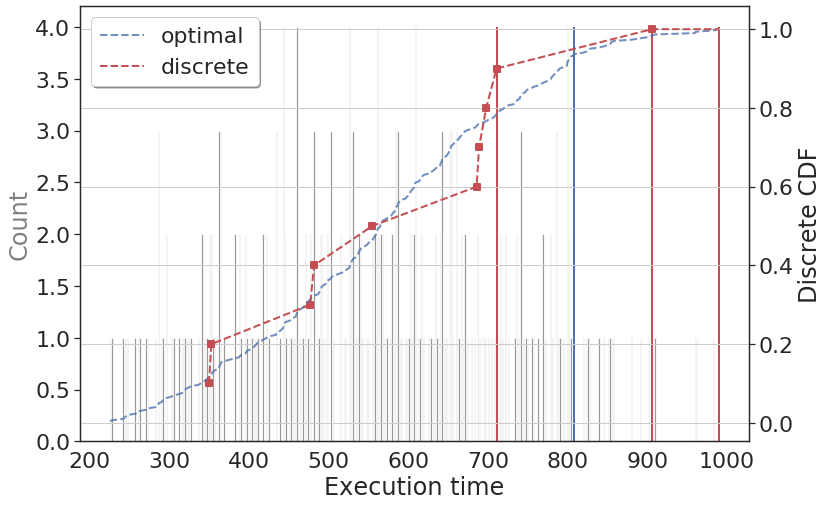

In [10]:
# plot the fit of the discrete fit (using the first x entries)

fig, ax = plt.subplots(figsize=(12,8))
sns.set(font_scale=2)
sns.set_style("white")
ax2 = ax.twinx()
counts, bins = np.histogram(data, bins=500)
ax.hist(bins[:-1], bins, weights=counts, alpha=0.8, color="grey")

# plot optimal sequence
ax.vlines(optimal_sequence[0], min(counts), max(counts), colors='b', lw=2,
          linestyles='solid', label='optimal')
for i in range(1,len(optimal_sequence)):
    ax.vlines(optimal_sequence[i], min(counts), max(counts), colors='b', lw=2, linestyles='solid')


# plot the discrete sequence
ax.vlines(discrete_sequence[0], min(counts), max(counts), colors='r', lw=2,
          linestyles='solid', label='discrete')
for i in range(1,len(discrete_sequence)):
    ax.vlines(discrete_sequence[i], min(counts), max(counts), colors='r', lw=2, linestyles='solid')

# plot optimal fit
ax2.plot(optimal_data, optimal_cdf, 'b--', lw=2, alpha=0.8, label="optimal")

# plot sample data
ax2.plot(discret_data + [max(data)], cdf + [1], 'r--', lw=2, alpha=1, label="discrete")
ax2.scatter(discret_data, cdf, marker="s", color="r", lw=2, alpha=1)

ax2.legend(shadow=True)
plt.grid(True)
ax.set_xlabel('Execution time')
ax2.set_ylabel('Discrete CDF')
ax.set_ylabel('Count', color="grey")
plt.show()

# Distribution interpolation

In [11]:
# compute the interpolation of the CDF points
wf.set_interpolation_model([WorkloadCDF.DistInterpolation(training_data)])
best_fit = wf.compute_best_cdf_fit()
if best_fit != -1:
     best_fit = wf.get_best_fit()
print(best_fit)
all_data_discrete, all_data_cdf = wf.get_interpolation_cdf(training_data, best_fit)

distr_sequence = wf.compute_request_sequence(max_request=max(data))
print("Distribution sequence", distr_sequence)
print("Distribution cost", wf.compute_sequence_cost(distr_sequence, data))

(<scipy.stats._continuous_distns.dgamma_gen object at 0x7f261e464b00>, (3.399701825166008, 601.3765318549988, 43.32735117892519), 3.82647482016972)
Distribution sequence [(906,), (990,)]
Distribution cost 922.5


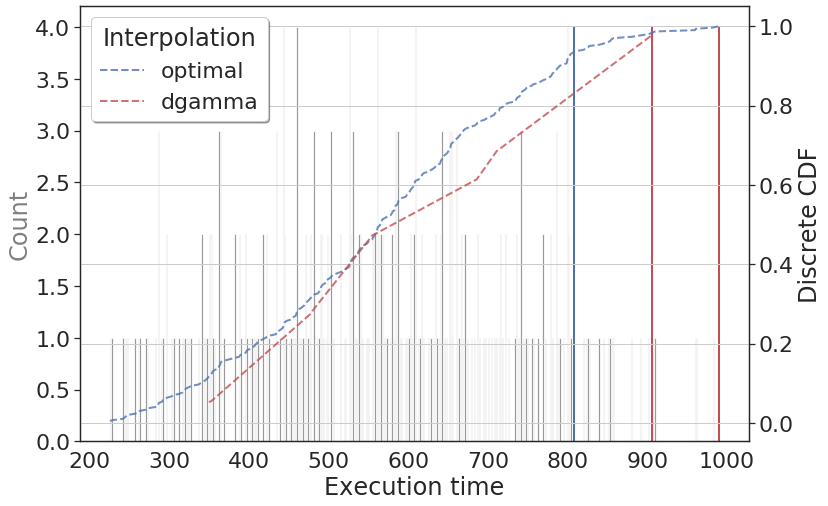

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set(font_scale=2)
sns.set_style("white")
ax2 = ax.twinx()
# plot data
counts, bins = np.histogram(data, bins=500)
ax.hist(bins[:-1], bins, weights=counts, alpha=0.8, color="grey")

# plot optimal sequence
ax.vlines(optimal_sequence[0], min(counts), max(counts), colors='b', lw=2,
          linestyles='solid', label='optimal')
for i in range(1,len(optimal_sequence)):
    ax.vlines(optimal_sequence[i], min(counts), max(counts), colors='b', lw=2, linestyles='solid')

# plot polynomial fit sequence
ax.vlines(distr_sequence[0], min(counts), max(counts), colors='r', lw=2,
          linestyles='solid', label='optimal')
for i in range(1,len(distr_sequence)):
    ax.vlines(distr_sequence[i], min(counts), max(counts), colors='r', lw=2, linestyles='solid')

# plot optimal fit
ax2.plot(optimal_data, optimal_cdf, 'b--', lw=2, alpha=0.8, label="optimal")

# polynomial fit
ax2.plot(all_data_discrete, all_data_cdf, 'r--', lw=2, alpha=0.8, label=best_fit[0].name)

ax2.legend(shadow=True, title="Interpolation")
plt.grid(True)
ax.set_xlabel('Execution time')
ax2.set_ylabel('Discrete CDF')
ax.set_ylabel('Count', color="grey")
plt.show()

# Synthetic workloads

Generate the data using the normal distribution - *Same workflow as for the log dataset*

## 1. Truncnorm

Parameters: $\mu$ = 8
$\sigma$ = 2

Truncated between [0, 20]

In [13]:
bins = 100
distribution = st.truncnorm
lower_limit = 0
upper_limit = 20
mu = 8
sigma = 2
upper_bound = (upper_limit - mu) / sigma
lower_bound = (lower_limit - mu) / sigma

In [14]:
data = distribution.rvs(lower_bound, upper_bound,
                        loc=mu, scale=sigma, size=100)

### Compute the optimal sequence 
### Plot it next to the discrete CDF based on the first x entries

In [19]:
training_data = random.sample(list(data), training_size)
wf = WorkloadCDF.WorkloadCDF(data)
optimal_data, optimal_cdf = wf.compute_discrete_cdf()

optimal_sequence = wf.compute_request_sequence()
print("Optimal sequence", optimal_sequence)
optimal_cost = wf.compute_sequence_cost(optimal_sequence, data)
print("Optimal cost", optimal_cost)

# discrete data
wf = WorkloadCDF.WorkloadCDF(training_data)
discret_data, cdf = wf.compute_discrete_cdf()

discrete_sequence = wf.compute_request_sequence(max_request=max(data))
print("Discrete sequence", discrete_sequence)
print("Discrete cost", wf.compute_sequence_cost(discrete_sequence, data))

Optimal sequence [(11.189979094606674,), (13.2470378846136,)]
Optimal cost 11.587390231145084
Discrete sequence [(7.821605230801782,), (13.2470378846136,)]
Discrete cost 14.710064930800863


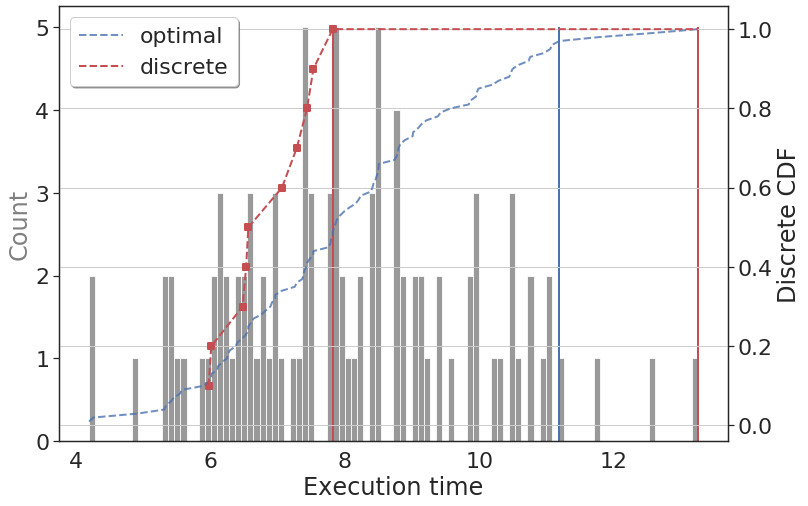

In [20]:
# plot the data and the discrete CDF (consecutive points joined by a line)

fig, ax = plt.subplots(figsize=(12,8))
sns.set(font_scale=2)
sns.set_style("white")
ax2 = ax.twinx()
counts, bins = np.histogram(data, bins=100)
ax.hist(bins[:-1], bins, weights=counts, alpha=0.8, color="grey")

# plot optimal sequence
ax.vlines(optimal_sequence[0], min(counts), max(counts), colors='b', lw=2,
          linestyles='solid', label='optimal')
for i in range(1,len(optimal_sequence)):
    ax.vlines(optimal_sequence[i], min(counts), max(counts), colors='b', lw=2, linestyles='solid')


# plot the discrete sequence
ax.vlines(discrete_sequence[0], min(counts), max(counts), colors='r', lw=2,
          linestyles='solid', label='discrete')
for i in range(1,len(discrete_sequence)):
    ax.vlines(discrete_sequence[i], min(counts), max(counts), colors='r', lw=2, linestyles='solid')

# plot optimal fit
ax2.plot(optimal_data, optimal_cdf, 'b--', lw=2, alpha=0.8, label="optimal")

# plot sample data
ax2.plot(discret_data + [max(data)], cdf + [1], 'r--', lw=2, alpha=1, label="discrete")
ax2.scatter(discret_data, cdf, marker="s", color="r", lw=2, alpha=1)

ax2.legend(shadow=True)
plt.grid(True)
ax.set_xlabel('Execution time')
ax2.set_ylabel('Discrete CDF')
ax.set_ylabel('Count', color="grey")
plt.show()

### Compute the interpolation sequence

In [21]:
# compute the interpolation of the CDF points
wf.set_interpolation_model([WorkloadCDF.DistInterpolation(data)])
best_fit = wf.compute_best_cdf_fit()
if best_fit != -1:
     best_fit = wf.get_best_fit()
print(best_fit)
all_data_discrete, all_data_cdf = wf.get_interpolation_cdf(data, best_fit)

distr_sequence = wf.compute_request_sequence(max_request=max(data))
print("Distribution sequence", distr_sequence)
print("Distribution cost", wf.compute_sequence_cost(distr_sequence, data))

(<scipy.stats._continuous_distns.laplace_gen object at 0x7f261e436fd0>, (7.857828127231038, 1.453855689328989), 1.7393963208794074)
Distribution sequence [(9.987707501445959,), (13.2470378846136,)]
Distribution cost 11.974763184137997


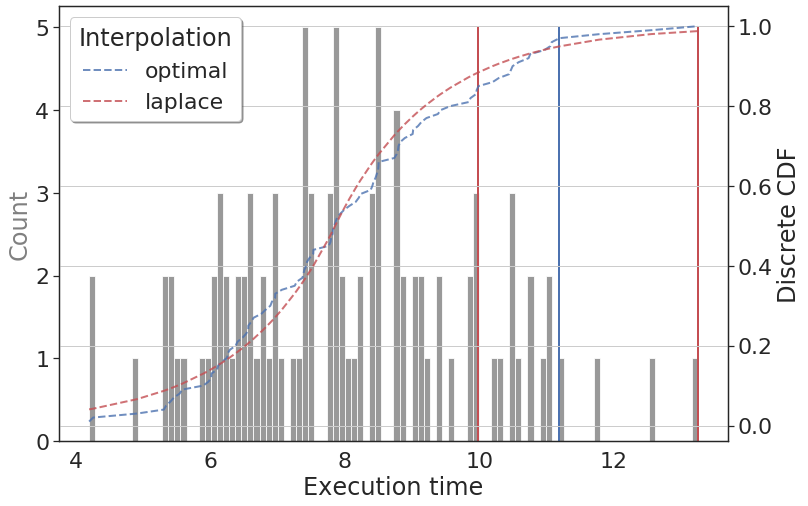

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set(font_scale=2)
sns.set_style("white")
ax2 = ax.twinx()
# plot data
counts, bins = np.histogram(data, bins=100)
ax.hist(bins[:-1], bins, weights=counts, alpha=0.8, color="grey")

# plot optimal sequence
ax.vlines(optimal_sequence[0], min(counts), max(counts), colors='b', lw=2,
          linestyles='solid', label='optimal')
for i in range(1,len(optimal_sequence)):
    ax.vlines(optimal_sequence[i], min(counts), max(counts), colors='b', lw=2, linestyles='solid')

# plot polynomial fit sequence
ax.vlines(distr_sequence[0], min(counts), max(counts), colors='r', lw=2,
          linestyles='solid', label='optimal')
for i in range(1,len(distr_sequence)):
    ax.vlines(distr_sequence[i], min(counts), max(counts), colors='r', lw=2, linestyles='solid')

# plot optimal fit
ax2.plot(optimal_data, optimal_cdf, 'b--', lw=2, alpha=0.8, label="optimal")

# polynomial fit
ax2.plot(all_data_discrete, all_data_cdf, 'r--', lw=2, alpha=0.8, label=best_fit[0].name)

ax2.legend(shadow=True, title="Interpolation")
plt.grid(True)
ax.set_xlabel('Execution time')
ax2.set_ylabel('Discrete CDF')
ax.set_ylabel('Count', color="grey")
plt.show()